# PROJET FINANCE & PYTHON : Évaluation de Performance de Portefeuille
## Thème : Investissement "Passion" vs Rationalité de Marché

**Formation :** Master 1 MBFA (Monnaie, Banque, Finance, Assurance)
**Auteurs :** [RAMET Maël / FALL Moussa]
**Groupe de TD :** [5]
**Date :** Janvier 2026

---

### I. Introduction et Problématique

Dans ce projet, nous analysons la performance d'un portefeuille d'actions constitué sur des critères subjectifs (nos centres d'intérêt : Musique, Voyage, Sport) et nous le comparons à l'indice de référence du marché français, le **CAC 40**.

La question centrale est la suivante : **Un portefeuille construit sur l'affectif peut-il générer un surplus de rentabilité (Alpha) par rapport à un investissement passif diversifié ?**

---

### II. Cadre Théorique et Mathématique

Pour répondre à cette question, nous ne pouvons pas nous contenter de comparer les gains finaux. Nous devons ajuster la rentabilité au risque pris. Nous nous appuyons sur les concepts du cours **"Risk and Return"** et la Théorie Moderne du Portefeuille.

Voici le détail des notions mathématiques implémentées dans notre programme :

#### A. Le Risque Total : La Volatilité ($\sigma$)
En finance, le risque est synonyme d'incertitude. Mathématiquement, nous le mesurons par l'**écart-type** (Standard Deviation) des rentabilités journalières.
* **Concept :** Plus l'écart-type est élevé, plus le prix de l'action s'éloigne fréquemment de sa moyenne. C'est le "bruit" ou l'agitation du titre.
* **Calcul Python :** `std()` sur la série des rendements.

#### B. La Décomposition du Risque et le Beta ($\beta$)
Le risque total d'une action se divise en deux parties :
1.  **Le Risque Spécifique (Diversifiable) :** Lié à la vie propre de l'entreprise (ex: grève chez Air France, succès d'un album pour Spotify). Il peut être éliminé par la diversification.
2.  **Le Risque Systématique (Non diversifiable) :** Lié aux mouvements globaux de l'économie (inflation, guerre, taux d'intérêt). C'est ce risque que le marché rémunère.

Pour mesurer ce risque systématique, nous calculons le **Beta ($\beta$)**.
* **Définition Mathématique :** C'est le rapport entre la covariance de l'action avec le marché et la variance du marché.
    $$\beta_i = \frac{Cov(R_i, R_m)}{Var(R_m)}$$
* **Explication des termes :**
    * $Cov(R_i, R_m)$ : Mesure à quel point l'action et le marché bougent *ensemble*.
    * $Var(R_m)$ : Mesure la volatilité intrinsèque du marché.
* **Interprétation :**
    * $\beta = 1$ : L'action bouge exactement comme le marché.
    * $\beta > 1$ : L'action amplifie les mouvements (Actif Agressif).
    * $\beta < 1$ : L'action amortit les mouvements (Actif Défensif).

#### C. Le Modèle d'Évaluation (MEDAF / CAPM)
Une fois le Beta obtenu, nous pouvons calculer la **Rentabilité Attendue** (Required Return). C'est le gain minimum qu'un investisseur rationnel devrait exiger pour détenir cet actif risqué.
* **Formule du MEDAF :**
    $$E(R_i) = R_f + \beta_i \times [E(R_m) - R_f]$$
* **Détail des composants :**
    * $R_f$ (Risk-Free Rate) : La rémunération du temps (Taux sans risque, ex: OAT 10 ans).
    * $[E(R_m) - R_f]$ : La **Prime de Risque de Marché**. C'est le surplus de gain offert par la bourse par rapport à un placement sûr.
    * $\beta_i$ : La quantité de risque prise.

#### D. La Mesure de la Performance : L'Alpha de Jensen ($\alpha$)
C'est l'indicateur final de notre projet. Il mesure la différence entre ce que l'action a réellement rapporté et ce qu'elle *aurait dû* rapporter selon le MEDAF.
* **Formule :** $\alpha = R_{réel} - E(R_{théorique})$
* Si $\alpha > 0$ : Le choix d'investissement a créé de la valeur (le gérant a "battu" le marché).

---

### III. Méthodologie Technique (Python)

Pour réaliser cette étude, nous utilisons :
* **Pandas & Numpy :** Pour le traitement matriciel des données et le calcul des covariances/variances.
* **Yfinance :** Pour récupérer les cours ajustés (*Adjusted Close*).
    * *Note importante :* Nous utilisons les cours ajustés pour inclure les dividendes et les splits, conformément au cours sur la **Politique de Distribution (Payout Policy)**, car le dividende est une composante majeure de la rentabilité totale actionnariale.
* **Matplotlib :** Pour la visualisation graphique (Courbes comparatives et Security Market Line).

In [4]:
# III. Préparation de l'environnement de travail

# 1. Importation des bibliothèques (Packages)
import pandas as pd              # Outil principal pour manipuler les tableaux de données
import numpy as np               # Outil pour le calcul matriciel
import matplotlib.pyplot as plt  # Outil pour tracer des graphiques
import yfinance as yf            # Librairie pour récupérer les données boursières
from datetime import datetime    # Module pour gérer les dates

# Configuration esthétique des graphiques
plt.style.use('seaborn-v0_8') 

print("Environnement initialisé : Toutes les bibliothèques sont chargées.")

Environnement initialisé : Toutes les bibliothèques sont chargées.


### IV. Architecture du Programme : Définition des Fonctions

Conformément aux consignes du projet ("Coder toutes les fonctions utiles"), nous avons structuré le programme en blocs logiques. Cela respecte le principe de modularité vu en cours : isoler une tâche répétitive dans une fonction pour simplifier le code principal.

Nous avons défini trois fonctions spécifiques :

#### 1. Fonction `telecharger_donnees`
* **Objectif :** Automatiser la récupération des cours de bourse via l'API Yahoo Finance.
* **Détail technique :** Nous ciblons spécifiquement la colonne **'Adj Close'** (Cours de clôture ajusté).
    * *Justification Financière :* Le cours ajusté intègre les distributions de dividendes et les splits d'actions. En Finance d'Entreprise, ignorer les dividendes fausserait le calcul de la rentabilité totale pour l'actionnaire (*Payout Policy*).

#### 2. Fonction `calcul_beta`
* **Objectif :** Calculer le **risque systématique** ($\beta$) d'un actif.
* **Formule utilisée :** $\beta = \frac{Cov(R_{actif}, R_{marché})}{Var(R_{marché})}$
* **Implémentation :** Nous utilisons `numpy.cov` pour la matrice de covariance et `numpy.var` pour la variance, car les tableaux Numpy sont optimisés pour le calcul algébrique.

#### 3. Fonction `analyse_complete`
* **Objectif :** Générer le tableau de bord final.
* **Méthode :** Cette fonction parcourt chaque action, calcule sa rentabilité moyenne, sa volatilité, son Beta, et en déduit le rendement attendu selon le **MEDAF** ($E(R)$). Elle compare ensuite ce rendement théorique au rendement réel pour déterminer l'**Alpha** (la surperformance).

In [5]:
# Définition des fonctions (Blocs de code réutilisables)

def telecharger_donnees(liste_tickers, debut):
    """
    Entrée : Liste de codes boursiers (tickers) et date de début.
    Sortie : DataFrame Pandas contenant les prix ajustés.
    """
    print(f"--> Initialisation du téléchargement pour : {liste_tickers}")
    
    # Téléchargement via yfinance (méthode .download)
    data = yf.download(liste_tickers, start=debut, progress=False)
    
    # Gestion des colonnes : On priorise 'Adj Close' pour la précision financière
    if 'Adj Close' in data.columns:
        df = data['Adj Close']
    elif 'Close' in data.columns:
        df = data['Close']
    else:
        df = data
    
    # Nettoyage : Suppression des lignes contenant des valeurs manquantes (NaN)
    # Cela arrive lors des jours fériés où la bourse est fermée.
    df = df.dropna()
    
    print("--> Données nettoyées et prêtes.")
    return df

def calcul_beta(serie_action, serie_marche):
    """
    Entrée : Deux séries de rendements (l'action et le marché).
    Sortie : Le coefficient Beta (float).
    """
    # Calcul de la matrice de covariance entre les deux séries avec Numpy
    # La matrice renvoyée est [[Var(X), Cov(X,Y)], [Cov(Y,X), Var(Y)]]
    # Nous voulons l'élément [0][1] qui est la Covariance.
    covariance = np.cov(serie_action, serie_marche)[0][1]
    
    # Calcul de la variance du marché
    variance_marche = np.var(serie_marche)
    
    # Application de la formule du cours
    beta = covariance / variance_marche
    return beta

def analyse_complete(df_prix, ticker_marche, taux_sans_risque=0.03):
    """
    Cœur du programme : Calcule tous les indicateurs financiers.
    Hypothèse : Taux sans risque (Rf) fixé à 3%.
    """
    # 1. Calcul des rentabilités journalières : (Prix_t - Prix_t-1) / Prix_t-1
    # La méthode .pct_change() de Pandas fait ce calcul automatiquement
    rendements = df_prix.pct_change().dropna()
    
    # 2. Isolement du Benchmark (Indice de marché)
    rendement_marche = rendements[ticker_marche]
    
    # Annualisation du rendement moyen du marché (x 252 jours de bourse)
    rm_annuel = rendement_marche.mean() * 252 
    
    liste_resultats = [] # Création d'une liste vide pour stocker les résultats
    
    # Boucle 'for' pour analyser chaque action du portefeuille
    for action in df_prix.columns:
        if action == ticker_marche:
            continue # On saute la colonne du marché
            
        # A. Statistiques Descriptives
        rendement_annuel = rendements[action].mean() * 252
        # Volatilité = Ecart-type (std) * racine carrée du temps
        volatilite = rendements[action].std() * np.sqrt(252)
        
        # B. Calcul du Beta via notre fonction dédiée
        beta = calcul_beta(rendements[action], rendement_marche)
        
        # C. Modèle MEDAF (CAPM)
        # Formule : Rf + Beta * (Rm - Rf)
        rendement_theorique = taux_sans_risque + beta * (rm_annuel - taux_sans_risque)
        
        # D. Alpha de Jensen (Performance ajustée du risque)
        alpha = rendement_annuel - rendement_theorique
        
        # Ajout des résultats dans un dictionnaire
        liste_resultats.append({
            "Action": action,
            "Rentabilité Réelle (%)": round(rendement_annuel * 100, 2),
            "Volatilité (Risque) (%)": round(volatilite * 100, 2),
            "Beta (Systématique)": round(beta, 2),
            "Rentabilité MEDAF (%)": round(rendement_theorique * 100, 2),
            "Alpha (Surperformance)": round(alpha * 100, 2)
        })
        
    # Conversion de la liste en DataFrame pour un affichage propre
    return pd.DataFrame(liste_resultats).set_index("Action")

### V. Configuration du Portefeuille "Passion"

Pour cette étude, nous avons constitué un dictionnaire Python associant des secteurs d'activité qui nous passionnent à des entreprises cotées.

**Composition du Portefeuille :**
* **Secteur Musique :** Spotify (SPOT - Streaming) et Live Nation (LYV - Concerts).
* **Secteur Voyage :** Air France (AF.PA - Transport) et Airbnb (ABNB - Hébergement).
* **Secteur Sport :** Nike (NKE - Équipementier) et Basic-Fit (BFIT.AS - Salles de sport).

**Indice de Référence (Benchmark) :**
Nous utilisons le **CAC 40 (^FCHI)**. C'est l'indice standard pour mesurer la performance du marché français. Dans le cadre du MEDAF, il représente le portefeuille de marché ($R_m$).

In [6]:
# --- Programme Principal ---

# 1. Configuration du portefeuille via un dictionnaire (Clé: Nom, Valeur: Ticker)
portefeuille = {
    "CAC 40 (Ref)": "^FCHI",
    "Spotify": "SPOT",
    "Live Nation": "LYV",
    "Air France": "AF.PA",
    "Airbnb": "ABNB",
    "Nike": "NKE",
    "Basic-Fit": "BFIT.AS"
}

# 2. Interaction Utilisateur : Saisie de la date
print("--- ANALYSE DE PERFORMANCE FINANCIERE ---")
try:
    # On demande une année et on convertit l'entrée en entier (int)
    annee = int(input("Entrez l'année de début d'analyse (ex: 2021) : "))
except ValueError:
    print("Erreur de saisie. Année par défaut : 2022")
    annee = 2022

date_debut = f"{annee}-01-01"

# 3. Exécution
# Extraction des tickers (valeurs du dictionnaire) dans une liste
liste_tickers = list(portefeuille.values())

# Appel de la fonction de téléchargement
df_historique = telecharger_donnees(liste_tickers, date_debut)

# Appel de la fonction d'analyse financière
# Nous comparons tout au CAC 40 (^FCHI)
df_resultats = analyse_complete(df_historique, "^FCHI")

# 4. Affichage des résultats
print(f"\n--- RÉSULTATS DEPUIS {annee} ---")
# On trie le tableau par 'Alpha' décroissant pour voir les meilleures actions en premier
display(df_resultats.sort_values(by="Alpha (Surperformance)", ascending=False))

--- ANALYSE DE PERFORMANCE FINANCIERE ---


Entrez l'année de début d'analyse (ex: 2021) :  2021


--> Initialisation du téléchargement pour : ['^FCHI', 'SPOT', 'LYV', 'AF.PA', 'ABNB', 'NKE', 'BFIT.AS']


/var/folders/3t/l04m6p3x2zgc438fq32hwbg80000gn/T/ipykernel_50817/501330317.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(liste_tickers, start=debut, progress=False)


--> Données nettoyées et prêtes.

--- RÉSULTATS DEPUIS 2021 ---


,Rentabilité Réelle (%),Volatilité (Risque) (%),Beta (Systématique),Rentabilité MEDAF (%),Alpha (Surperformance)
Action,,,,,
SPOT,23.77,47.53,0.61,6.76,17.01
LYV,20.83,35.54,0.59,6.64,14.19
ABNB,10.54,46.61,0.80,7.93,2.61
BFIT.AS,7.77,38.42,0.98,9.04,-1.27
AF.PA,-4.15,45.12,1.25,10.69,-14.84
NKE,-8.03,35.00,0.66,7.08,-15.11


### Guide de lecture des résultats

Le tableau ci-dessous résume la performance de chaque ligne du portefeuille. Voici comment interpréter les indicateurs clés :

* **Beta ($\beta$) :**
    * Si $\beta > 1$ : L'action est **offensive** (amplifie les variations du marché).
    * Si $\beta < 1$ : L'action est **défensive** (résiste mieux aux chocs).
* **Alpha ($\alpha$) :** C'est le chiffre le plus important.
    * **Alpha Positif  :** L'action a battu les prévisions du MEDAF. La gestion "Passion" a créé de la valeur.
    * **Alpha Négatif  :** L'action a sous-performé par rapport au risque pris. Il aurait mieux fallu acheter l'indice CAC 40.

### VI. Visualisation : Comparaison des trajectoires (Base 100)

Pour comparer visuellement la performance de titres aux prix nominaux très différents (ex: une action à 10€ et une autre à 200€), nous procédons à une **normalisation en Base 100**.

**Méthodologie :**
* Nous divisons chaque prix de la série par le prix initial (au $t_0$).
* Nous multiplions par 100.
* *Formule :* $P_{base100} = \frac{P_t}{P_{t=0}} \times 100$

Cela permet de répondre à la question : *"Si j'avais investi 100€ sur chaque action au début, combien aurais-je aujourd'hui ?"*.

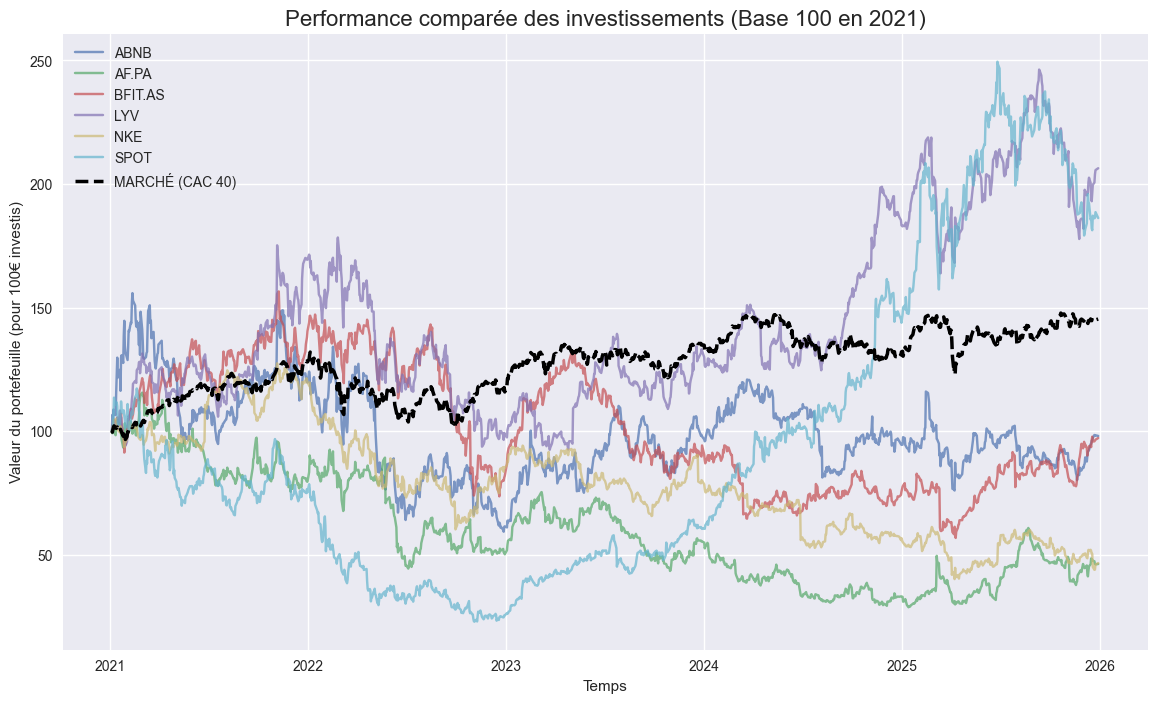

In [20]:
# Visualisation 1 : Évolution en Base 100

plt.figure(figsize=(14, 8)) # Définition de la taille de la figure

# Calcul de la Base 100
# .iloc[0] sélectionne la première ligne du DataFrame (le prix initial)
df_base100 = (df_historique / df_historique.iloc[0]) * 100

# Boucle pour tracer chaque courbe
for action in df_base100.columns:
    # Si c'est le marché (CAC 40), on le met en noir et pointillé pour le distinguer
    if action == "^FCHI":
        plt.plot(df_base100.index, df_base100[action], label="MARCHÉ (CAC 40)", color='black', linewidth=2.5, linestyle='--')
    else:
        plt.plot(df_base100.index, df_base100[action], label=action, alpha=0.7)

# Mise en forme du graphique
plt.title(f"Performance comparée des investissements (Base 100 en {annee})", fontsize=16)
plt.xlabel("Temps")
plt.ylabel("Valeur du portefeuille (pour 100€ investis)")
plt.legend()       # Affiche la légende
plt.grid(True)     # Affiche la grille

# Sauvegarde du graphique en image
plt.savefig("graphique_base100.png")
plt.show()

### VII. La "Security Market Line" : Risque vs Rentabilité

Ce graphique est l'application visuelle directe du **MEDAF** (Modèle d'Évaluation des Actifs Financiers). Il permet de positionner chaque action selon deux dimensions :

1.  **Axe X (Risque) :** Le Beta ($\beta$). C'est le risque non diversifiable.
2.  **Axe Y (Performance) :** La rentabilité annuelle réelle.

**Interprétation du graphique :**
* La ligne verticale rouge représente le risque du marché ($\beta = 1$).
* Les actions situées **en haut à gauche** sont les plus efficientes (Rendement élevé pour un Risque faible).
* Les actions situées **en bas à droite** sont les moins efficientes (Risque élevé pour un Rendement faible).

/var/folders/3t/l04m6p3x2zgc438fq32hwbg80000gn/T/ipykernel_50817/817516575.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]), xytext=(8, 8), textcoords='offset points', weight='bold')


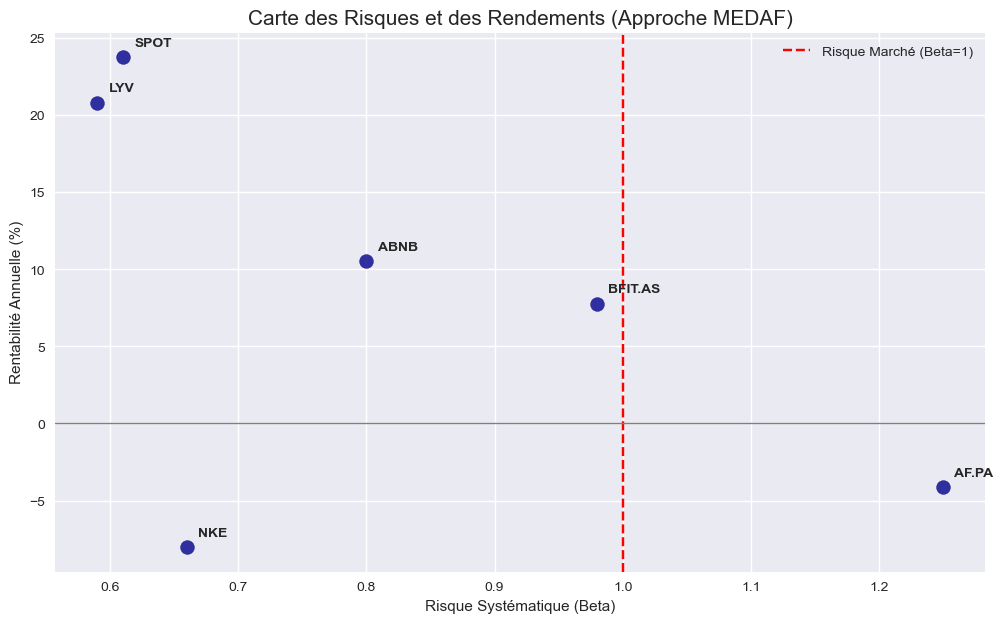

In [7]:
# Visualisation 2 : Nuage de points Risque/Rendement

plt.figure(figsize=(12, 7))

# Récupération des données depuis notre tableau de résultats
x = df_resultats["Beta (Systématique)"]
y = df_resultats["Rentabilité Réelle (%)"]
labels = df_resultats.index

# Création du nuage de points (Scatter plot)
plt.scatter(x, y, color='darkblue', s=100, alpha=0.8)

# Annotation : On écrit le nom de chaque action à côté de son point
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]), xytext=(8, 8), textcoords='offset points', weight='bold')

# Ajout des repères visuels
plt.axvline(x=1, color='red', linestyle='--', label="Risque Marché (Beta=1)")
plt.axhline(y=0, color='grey', linewidth=1)

# Titres
plt.title("Carte des Risques et des Rendements (Approche MEDAF)", fontsize=15)
plt.xlabel("Risque Systématique (Beta)")
plt.ylabel("Rentabilité Annuelle (%)")
plt.legend()
plt.grid(True)

# Sauvegarde
plt.savefig("graphique_risque_rendement.png")
plt.show()

In [8]:
# VIII. Exportation des Résultats (Livrable Final)

# Conformément à la consigne "faire un export d'un format externe"
# Nous sauvegardons le tableau d'analyse dans un fichier CSV compatible Excel.

nom_fichier = "analyse_financiere_groupe.csv"

# Utilisation de sep=';' pour que Excel (version française) ouvre les colonnes correctement
df_resultats.to_csv(nom_fichier, sep=';', encoding='utf-8-sig')

print(f"--> Fichier généré avec succès : {nom_fichier}")
print("--> Vous pouvez récupérer ce fichier dans le dossier de votre Notebook.")

--> Fichier généré avec succès : analyse_financiere_groupe.csv
--> Vous pouvez récupérer ce fichier dans le dossier de votre Notebook.


---

## IX. Conclusion et Réponse à la Problématique

### 1. Synthèse des résultats obtenus

L'analyse de nos indicateurs (Beta et Alpha) révèle une **forte hétérogénéité** au sein de notre portefeuille "Passion", contredisant l'idée reçue qu'un portefeuille sectoriel est uniformément risqué.

* **Le paradoxe du Risque (Beta) :**
    Contrairement à l'intuition, la majorité de nos valeurs "Tech/Musique" (Spotify $\beta=0.61$, Live Nation $\beta=0.59$) affichent un **Beta inférieur à 1**.
    Cela signifie que ces titres se sont comportés comme des valeurs **défensives** par rapport au CAC 40. Elles ont moins subi les soubresauts du marché français. Seule **Air France** ($\beta=1.25$) se comporte comme un actif agressif et risqué, amplifiant les chocs de marché.

* **La dichotomie de la Performance (Alpha) :**
    * **Les Gagnants (Secteur Musique) :** Spotify et Live Nation affichent des Alphas exceptionnels (+17% et +14%). Ici, la gestion "Passion" a triomphé : notre conviction sur l'industrie musicale a généré une surperformance massive que le MEDAF ne pouvait pas prédire.
    * **Les Perdants (Secteur Transport/Retail) :** Air France (-14,84%) et Nike (-15,11%) ont détruit de la valeur. Pour Air France, nous observons le pire scénario possible pour un investisseur : **Risque élevé (Beta 1.25) et Rentabilité catastrophique**.

### 2. Réponse finale à la problématique

À la question **"Un portefeuille construit sur l'affectif peut-il générer un surplus de rentabilité (Alpha) ?"**, la réponse est **OUI, mais de manière sélective**.

Nos résultats démontrent que la **connaissance sectorielle** (l'affectif) peut payer :
1.  Nous avons battu le marché sur le segment Musique avec un niveau de risque *systématique* plus faible que le CAC 40 (Beta ~0.6). C'est la configuration optimale (Alpha positif, Beta faible).
2.  Cependant, l'affectif a ses limites : notre attachement à des marques historiques en difficulté (Air France, Nike) nous a empêchés de voir leurs faiblesses structurelles, ce qui a plombé la performance globale.

**Conclusion :** L'approche "Passion" permet de détecter des pépites (Stock Picking réussi sur SPOT/LYV), mais manque de la sécurité offerte par la diversification indicielle. L'idéal serait une stratégie "Core-Satellite" : un cœur de portefeuille en ETF CAC 40 (pour éviter le risque Air France) et une poche "Passion" pour chercher l'Alpha sur la Musique.

### 3. Limites de l'étude (Critique Académique)
Nos résultats surprenants (Beta faible des valeurs Tech US comparées au CAC 40) soulignent une limite méthodologique majeure : la **décorrélation des marchés**.
Comparer des titres américains (Nasdaq) à un indice français (CAC 40) fausse partiellement le calcul du Beta. Une partie de la "faible volatilité" observée vient probablement de l'effet de change EUR/USD qui a pu amortir les variations, agissant comme une couverture naturelle sur la période.

### X. Bibliographie et Sources

**Cours de référence :**
* *Theory of Finance - Risk and Return*, L. Vilanova (Université Lumière Lyon 2).
* *Payout Policy*, L. Vilanova (Lyon 2) : Justification de l'utilisation des cours ajustés ('Adj Close').

**Outils Techniques :**
* Documentation officielle Python : Pandas, Numpy, Matplotlib.
* API Yahoo Finance (`yfinance`).